<a href="https://colab.research.google.com/github/RafisSomeone/Tutorial-3/blob/master/Tutorial_3_pt_16_15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1: Zbiory danych
Wykorzystamy następujące zbiory:

*   Tic-tac-spam(2 klasy) - baza która klasyfikuje maile czy należą do spamu na podstawie założonynch cech.
*   Mnist(10 klas)
*   kolorowy obrazek 200 x 200 pixeli



In [0]:
from sklearn.datasets import fetch_openml
mnist_set = fetch_openml("mnist_784", data_home="./mnist_784", cache=True)

In [0]:
from sklearn.datasets import fetch_openml
import pandas as pd
import numpy as np

sample = 2000
tic_tac_set = fetch_openml("spambase", data_home="./spambase", cache=True)
pd.DataFrame([np.append(sample, tic_tac_set.target[i]) for i, sample in enumerate(tic_tac_set.data)],columns=np.append(tic_tac_set.feature_names, 'is_spam'))[:20]

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,is_spam
0,0.0,0.64,0.64,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.64,0.0,0.0,0.0,0.32,0.0,1.29,1.93,0.0,0.96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.778,0.0,0.0,3.756,61.0,278.0,1
1,0.21,0.28,0.5,0.0,0.14,0.28,0.21,0.07,0.0,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.0,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.132,0.0,0.372,0.18,0.048,5.114,101.0,1028.0,1
2,0.06,0.0,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.0,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.01,9.821,485.0,2259.0,1
3,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.0,0.0,0.31,0.0,0.0,3.18,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.137,0.0,0.137,0.0,0.0,3.537,40.0,191.0,1
4,0.0,0.0,0.0,0.0,0.63,0.0,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.0,0.0,0.31,0.0,0.0,3.18,0.0,0.31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.135,0.0,0.135,0.0,0.0,3.537,40.0,191.0,1
5,0.0,0.0,0.0,0.0,1.85,0.0,0.0,1.85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.223,0.0,0.0,0.0,0.0,3.0,15.0,54.0,1
6,0.0,0.0,0.0,0.0,1.92,0.0,0.0,0.0,0.0,0.64,0.96,1.28,0.0,0.0,0.0,0.96,0.0,0.32,3.85,0.0,0.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.054,0.0,0.164,0.054,0.0,1.671,4.0,112.0,1
7,0.0,0.0,0.0,0.0,1.88,0.0,0.0,1.88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.206,0.0,0.0,0.0,0.0,2.45,11.0,49.0,1
8,0.15,0.0,0.46,0.0,0.61,0.0,0.3,0.0,0.92,0.76,0.76,0.92,0.0,0.0,0.0,0.0,0.0,0.15,1.23,3.53,2.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,0.271,0.0,0.181,0.203,0.022,9.744,445.0,1257.0,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.0,0.06,0.0,0.0,0.64,0.25,0.0,0.12,0.0,0.0,0.12,1.67,0.06,0.71,0.0,0.19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.0,0.0,0.0,0.04,0.03,0.0,0.244,0.081,0.0,1.729,43.0,749.0,1


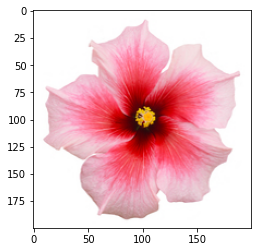

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import urllib.request
img = open('img.jpg','wb')
img.write(urllib.request.urlopen('https://dictionary.cambridge.org/pl/images/thumb/flower_noun_002_14403.jpg?version=5.0.75').read())
img.close()

img=Image.open('img.jpg', 'r')
img=img.resize((200,200))
image_array = np.asarray(img)
imshow(image_array)

In [0]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale
from copy import deepcopy
import pandas as pd

import csv

tic_tac = {
    'data' : tic_tac_set.data,
    'target' : tic_tac_set.target,
    'feature_names' : tic_tac_set.feature_names
}

part_data = mnist_set.data[:2000]
part_target = mnist_set.target[:2000]


mnist ={
    'data' : part_data,
    'target' : part_target,
    'feature_names' : mnist_set.feature_names
}


# 2: Problem 1
Tworzymy po 10 instancji zbiorów uczących: 5%, 75% oraz one-to-all.
Reszta zbioru to zbiór testowy.
One-to-all polega na użyciu pozytywnych przypadków jednej klasy wieloklasowego problemu klasyfikacji jako zbioru 

In [0]:
import numpy as np
from sklearn.model_selection import LeaveOneOut
instances_number = 10

def multiply_sets(dataset,instances_number): 
  table =[]
  for size in [0.05,0.75]:         # tworzymy zbiory uczące 5%, 75%            
    for x in range(instances_number):   # tworzymy 10 instancji każdego zbioru
      X_train, X_test, Y_train, Y_test = train_test_split(dataset['data'],dataset['target'], train_size=size)
    
      data = {
          'size' : size,
          'X_train': X_train,
          'X_test' : X_test,
          'Y_train' : Y_train,
          'Y_test' : Y_test
      }
      table.append(data)
  return table


def leave_one_out(dataset):
  splitter = LeaveOneOut()
  table = [] 
  small_data = []
  small_target = []
  for i in range(200):                                              # wybieram 200 losowo
     x = int(np.random.choice(np.arange(len(dataset.data))))
     small_data.append(dataset.data[x])
     small_target.append(dataset.target[x])
  small_data= np.array(small_data)
  small_target = np.array(small_target)

  for train_index_table, test_index_table in splitter.split(small_data): #dzielimy za pomocą LeaveOneOut
    data = {
        'size' : 'one to all',
        'X_train' : small_data[train_index_table],
        'X_test' : small_data[test_index_table],
        'Y_train' : small_target[train_index_table],
        'Y_test' : small_target[test_index_table]
    }
    table.append(data)
  return table

mnist_table = multiply_sets(mnist,instances_number)
tic_tac_table = multiply_sets(tic_tac,instances_number)
one_table_mnist = leave_one_out(mnist_set)
one_table_tic_tac = leave_one_out(tic_tac_set)

#3: Obliczanie średniego błedu klasyfikacji oraze jego odchylenia standardowego.
Błąd klasyfikacji dla elementów xi zbioru testowego liczymy jako średnią (suma przez liczbe elementów zbioru testowego) stosunku ilości k najbliższych
punktów uczących należących do tej samej klasy co xi, dzielone przez k. Odchylenie liczymy dla średnich wszystkich 10 instancji.


Na początku obliczmy błąd dla przykładowego zbioru tic_tac 5% zbiór treningowy i k = 3 .
Dla każdego elementu xi zbioru testowego pobieramy liste k-sąsiadów.


In [0]:
from sklearn.neighbors import KNeighborsClassifier
k = 3
dataset = tic_tac_table[0]
knn_all = KNeighborsClassifier(n_neighbors = k)    #Stosujemy klasyfikator k-NN
knn_all.fit(dataset['X_train'], dataset['Y_train'])
neighbors = knn_all.kneighbors(dataset['X_test'], return_distance=False) 
neighbors

array([[183, 225, 145],
       [ 75,  32,  11],
       [ 14, 155, 120],
       ...,
       [118,  30,  57],
       [ 87,  94, 104],
       [175, 130, 133]])

Każdy element xi otrzymuje liste indeksów elementów ze zbioru treningowego np. dla i = 0 :


In [0]:
i = 0
element_xi = dataset['X_test'][i]
element_xi_class =  dataset['Y_test'][i]
indices = neighbors[0] 
print('Element xi zbioru testowego: ',element_xi, "\n jego klasa ",element_xi_class) 
print('Indeksy k-sąsiadów : ',indices) 
print('K-sąsiedzi:')
for index in indices:
  print(dataset['X_train'][index],"\n jego klasa ",dataset['Y_train'][index])

Element xi zbioru testowego:  [ 0.53   0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.53   0.     1.6    0.
  1.06   0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.062
  0.     0.311  0.     0.     1.954 11.    43.   ] 
 jego klasa  1
Indeksy k-sąsiadów :  [183 225 145]
K-sąsiedzi:
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.81   0.     0.     0.     0.     0.     0.     1.81   0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     1.81   0.     0.     0.     0.     0.     0.     0.     0.286
  0.     0.     0.     0.     2.277  9.    41.   ] 
 jego klasa  0
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.  

Następnie zliczamy k-sąsiadów tej samej klasy co element xi i dzielimy tą wartość przez k.

In [0]:
sum_same_class = 0
for j in range(k):                                        
  neighbor_class = dataset['Y_train'][indices[j]]
  if neighbor_class == element_xi_class:
    sum_same_class += 1
result_of_element_xi = sum_same_class/k
result_of_element_xi

0.3333333333333333

Operację tą powtarzamy dla każdego elementy xi zbioru testowego, sumujemy wartości i dzielimy przez ilość elementów zbioru testowego.

In [0]:
import numpy as np 

def knn_mean_error(dataset,k):
  knn_all = KNeighborsClassifier(n_neighbors = k)    
  knn_all.fit(dataset['X_train'], dataset['Y_train'])
  neighbors = knn_all.kneighbors(dataset['X_test'], return_distance=False) #Pobieramy listę sąsiadów dla każdego elementu xi ze zbioru testowego
  sum_mean = 0
  for i in range(len(dataset['Y_test'])): # Obliczamy błąd klasyfikacji dla każdego elementu xi ze zbioru testowego.
    sum_same_class = 0                     
    element_class = dataset['Y_test'][i]

    for j in range(k):                                        #Zliczamy sąsiadów tej samej klasy 
      neighbor_class = dataset['Y_train'][neighbors[i][j]]
      if neighbor_class == element_class:
        sum_same_class += 1

    mean_class =  sum_same_class/k #Dzielimy liczbę sąsiadów tej samej klasy co element xi przez liczbę sąsiadów
    sum_mean += mean_class
  classification_error = sum_mean/len(dataset['X_test']) #Liczymy błąd klasyfikacji
  return classification_error

def mean_table(table,offset):
  for k in [1,3,5,100]:
    knn_error_table = []
    for instance_no in range(instances_number):
      knn_error = knn_mean_error(table[instance_no+offset],k)
      knn_error_table.append(knn_error)
    error_mean = np.mean(knn_error_table)   #Liczymy średnią błędu klasyfikacji
    error_variance = np.var(knn_error_table) #Liczymy wariancję błedu klasyfikacji
    print("   Średnia dla k = {0} : {1}   Wariancja dla k = {2} : {3}".format(k,error_mean,k,error_variance))

def mean_one(table):
  for k in [1,3,5,10]:
    knn_error_table = []
    for instance_no in range(len(table)):
      knn_error = knn_mean_error(table[instance_no],k)
      knn_error_table.append(knn_error)
    error_mean = np.mean(knn_error_table)   #Liczymy średnią błędu klasyfikacji
    error_variance = np.var(knn_error_table) #Liczymy wariancję błedu klasyfikacji
    print("   Średnia dla k = {0} : {1}   Wariancja dla k = {2} : {3}".format(k,error_mean,k,error_variance))
for index in range(2):
  offset = index * instances_number
  print("Wyniki dla tic tac {0}%:".format(tic_tac_table[offset]['size']))
  mean_table(tic_tac_table,offset)
  print("Wyniki dla mnist {0}%:".format(mnist_table[offset]['size']))
  mean_table(mnist_table,offset)
print("Wynik dla mnist leave one out split:")
mean_one(one_table_mnist)
print("Wynik dla tic tac leave one out split:")
mean_one(one_table_tic_tac)

Wyniki dla tic tac 0.05%:
   Średnia dla k = 1 : 0.6952871196522535   Wariancja dla k = 1 : 0.0001930262376436361
   Średnia dla k = 3 : 0.668092732402957   Wariancja dla k = 3 : 6.551183263391408e-05
   Średnia dla k = 5 : 0.6549256463051949   Wariancja dla k = 5 : 8.640974673396589e-05
   Średnia dla k = 100 : 0.5996355525051473   Wariancja dla k = 100 : 0.00017076058118123324
Wyniki dla mnist 0.05%:
   Średnia dla k = 1 : 0.7193684210526317   Wariancja dla k = 1 : 0.00011622160664819927
   Średnia dla k = 3 : 0.606456140350877   Wariancja dla k = 3 : 0.0005564776854416834
   Średnia dla k = 5 : 0.5309473684210525   Wariancja dla k = 5 : 0.0005615423822714581
   Średnia dla k = 100 : 0.09989421052631658   Wariancja dla k = 100 : 7.525731301947863e-07
Wyniki dla tic tac 0.75%:
   Średnia dla k = 1 : 0.8195482189400523   Wariancja dla k = 1 : 0.00018479001751961247
   Średnia dla k = 3 : 0.7752678830002885   Wariancja dla k = 3 : 0.00012052124558078204
   Średnia dla k = 5 : 0.75487402

#Zadanie  (Do wykonania)
Powtórzyć obliczanie średniej dla zbiorów mnist i tic tac tworząc 10 instancji zbiorów uczących 25% reszta jako zbiór testowy, k = 1,3,5,100. Porównać wyniki ze średniami z poprzedniego zadania.



#4: PCA

PCA(Analiza składowych głównych) to **algorytm redukcji wymiarów**, który polega na rzutowaniu danych do przestrzeni o mniejszej liczbie wymiarów tak, aby jak najlepiej zachować strukturę danych. Dzięki temu możemy przedstawić wyniki 9 - wymiarowego zbioru tic-tac-toe jako 2 - wymiarową tablicę. 

Przy pomocy PCA dokonamy wizualizacji wyników dla zbioru tic_tac.


In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

Zbiory uczące to 5% i 75%.

In [0]:
dataset_05 = tic_tac_table[0]
dataset_75 = tic_tac_table[11]

k=100

In [0]:
def PCA_visualization(dataset, k):

    df = pd.DataFrame(dataset['X_train'], columns=tic_tac['feature_names']) 
    scaler = StandardScaler()     # używamy skalara do odpowiedniego dopasowania danych
    scaler.fit(df)

    scaled_data = scaler.transform(df)

    pca = PCA(n_components=2)     # PCA bierze pod uwagę dwie główne składowe
    pca.fit(scaled_data)

    x_pca = pca.transform(scaled_data)

    print("Rozmiar danych przed PCA:" + str(scaled_data.shape))
    print("Rozmiar danych po PCA:" + str(x_pca.shape))

    colors_set = np.where(dataset['Y_train'] == '0', 0.0, dataset['Y_train'])
    colors_set = np.where(colors_set == '1', 1.0, colors_set)

    plt.figure(figsize=(8, 6))
    plt.scatter(x_pca[:, 0], x_pca[:, 1], c=colors_set, cmap='prism')
    plt.xlabel('First principal component')
    plt.ylabel('Second Principal Component')

    red_patch = mpatches.Patch(color='red', label='Spam')
    green_patch = mpatches.Patch(color='lime', label='No spam')
    plt.legend(handles=[red_patch, green_patch])
    plt.show()


Rozmiar danych przed PCA:(230, 57)
Rozmiar danych po PCA:(230, 2)


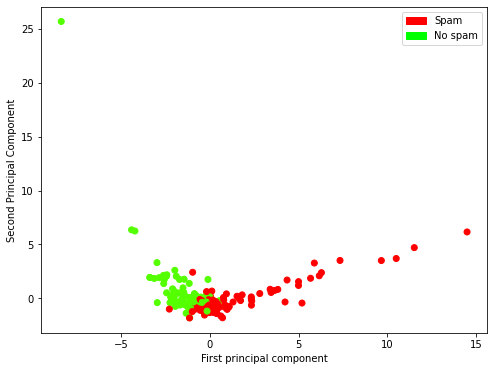

Rozmiar danych przed PCA:(3450, 57)
Rozmiar danych po PCA:(3450, 2)


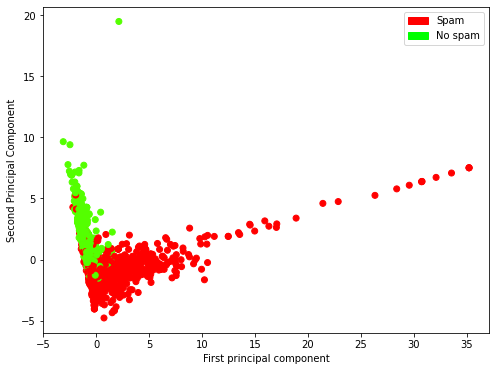

In [0]:
PCA_visualization(dataset_05, k)
PCA_visualization(dataset_75, k)

#Zadanie (Do wykonania):
Zobrazuj na rysunku punkty, które zostały błędnie określone w podanych wyżej zbiorach uczących i dla najlepszego k z zadania 3.

#5: Działania na obrazku
Mamy kolorowy obrazek 200x200 pixeli, generujemy losowo zbiór pikseli uczących w ilości 10%, 50%, 75%. Wykonujemy to 5- krotnie (5
instancji dla każdego zbioru uczącego). Kolory reszty z pikseli liczymy jako średnią z k=1, 3, 10 najbliższych sąsiadów ze zbioru uczącego

(200, 200, 3)


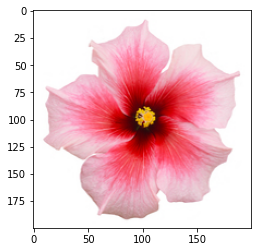

In [0]:
from matplotlib.pyplot import imshow
import numpy as np
from PIL import Image
from matplotlib.pyplot import imshow
import urllib.request
img = open('img.jpg','wb')
img.write(urllib.request.urlopen('https://dictionary.cambridge.org/pl/images/thumb/flower_noun_002_14403.jpg?version=5.0.75').read())
img.close()

img=Image.open('img.jpg', 'r')
img=img.resize((200,200))
image_array = np.asarray(img)
imshow(image_array)
print(image_array.shape)
imageX=[]
imageY=[]
for i in range(200):
  for j in range(200):
    imageX.append([i,j])
    imageY.append(image_array[i][j])
imageX=np.array(imageX)
imageY=np.array(imageY)

Po wczytaniu obrazka należy go potraktować jako zbiór danych pixeli. Dzielimy pixele na treningowe i testowe. W nowym obrazku pixele treningowe będą miały oryginalną wartość, natomiast testowe będą miały kolor jako średnią k najbliższych siąsiednich pixeli treningowych. Nasz zbiór modeli będzie się składał z takich samych wersji dla każdej kombinacji k (ilość sąsiadów)=[1,3,10] i p(wielkość procentowa zbioru treningowego)=[0.1,0.5,0.75]

In [0]:
from sklearn.model_selection import train_test_split
def multiply_sets(instances_number):
  image_table =[]
  for x in range(instances_number):
    for size in [0.1,0.5,0.75]:
      for k in [1,3,10]:
        X_train, X_test, Y_train, Y_test = train_test_split(imageX,imageY, train_size=size)
      
        data = {
            'X_train': X_train,
            'X_test' : X_test,
            'Y_train' : Y_train,
            'Y_test' : Y_test,
            'neighbors':k,
            'p':size

        }
        image_table.append(data)
       #print(data.keys())
  return np.array(image_table)

In [0]:
from sklearn.neighbors import KNeighborsClassifier
def mean_color(k,neighbors,y):
  result=np.zeros([3],dtype='uint8')
  for i in neighbors:
    result+=(y[i]/k).astype('uint8')
  #print((result/k).astype(int))
  return result



def generate_image(model,k):
  knn_all = KNeighborsClassifier(n_neighbors = k)    #Stosujemy klasyfikator k-NN
  knn_all.fit(model['X_train'], model['Y_train'])
  neighbors = knn_all.kneighbors(model['X_test'], return_distance=False) 
  #print(neighbors)
  p=np.zeros([200,200,3],dtype='uint8')
  for i in range(len(model['X_train'])):
    p[model['X_train'][i][0]][model['X_train'][i][1]]=model['Y_train'][i]
  for i in range(len(model['X_test'])):
    p[model['X_test'][i][0]][model['X_test'][i][1]]=mean_color(k,neighbors[i],model['Y_train'])
  %matplotlib inline
  imshow(np.asarray(p))
  return p



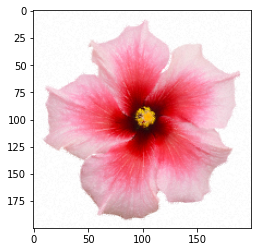

In [0]:
models=multiply_sets(5)
len(models)
gen_images=[]
for m in models:
  gen_images.append([generate_image(m,m['neighbors']),m['p'],m['neighbors']])

#6: Błąd dla każdego wygenerowanego obrazka w porównaniu z oryginałem
Dla powstałych modeli należy obliczyć błąd, można zastosować błąd średniokwadratowy

In [0]:
 from sklearn.metrics import mean_squared_error
 im=image_array.reshape(200*200*3)
 for g in gen_images:
    img=g[0].reshape(200*200*3)
    print("mean squarred error for image with:"+str(g[1]*100)+"% traing pixels and "+str(g[2])+" neighbors:"+str(round(mean_squared_error(im, img),4)))

  

mean squarred error for image with:10.0% traing pixels and 1 neighbors:24.8546
mean squarred error for image with:10.0% traing pixels and 3 neighbors:25.5445
mean squarred error for image with:10.0% traing pixels and 10 neighbors:46.058
mean squarred error for image with:50.0% traing pixels and 1 neighbors:11.1607
mean squarred error for image with:50.0% traing pixels and 3 neighbors:9.715
mean squarred error for image with:50.0% traing pixels and 10 neighbors:20.3993
mean squarred error for image with:75.0% traing pixels and 1 neighbors:5.5838
mean squarred error for image with:75.0% traing pixels and 3 neighbors:4.2024
mean squarred error for image with:75.0% traing pixels and 10 neighbors:9.8215
mean squarred error for image with:10.0% traing pixels and 1 neighbors:24.7688
mean squarred error for image with:10.0% traing pixels and 3 neighbors:25.8917
mean squarred error for image with:10.0% traing pixels and 10 neighbors:44.9682
mean squarred error for image with:50.0% traing pixels

teoretycznie najdokładniejsze obrazki powstają dla mniejszej ilości sąsiadów i większym zbiorze treningowym

#7: Zadanie (Do wykonania)
Dla każdego przypadku uczącego (10%, 50%, 75%.) policzyć średnie wartości pikseli testowych
(nieznanych) z wygenerowanych 5 obrazków. Jak wygląda tak wygenerowany obrazek. Czy błąd się
zmniejszył??? 

mean squarred error for image with:10.0% traing pixels and 1 neighbors:67.9356


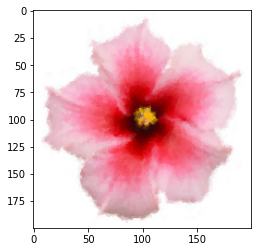

In [0]:
percent=[0.1]
neighbors=[1]
alike_models=[]
len(gen_images[0])
for p in percent:
  for n in neighbors:
    for g in gen_images:
      if g[1]==p and g[2]==n:
        alike_models.append(g[0])
    mean_picture=(np.divide(((alike_models[0]/5).astype('uint8')+(alike_models[1]/5).astype('uint8')+(alike_models[2]/5).astype('uint8')+(alike_models[3]/5).astype('uint8')+(alike_models[4]/5)).astype('uint8'),1))
    mean_picture=mean_picture.astype(int)
    m=mean_picture.reshape([200*200*3])
    print("mean squarred error for image with:"+str(p*100)+"% traing pixels and "+str(n)+" neighbors:"+str(round(mean_squared_error(im, m),4)))
    mean_picture.reshape([200,200,3])
    imshow(np.asarray(mean_picture))
    #print(len(alike_models))
    alike_models.clear()